# Ex 31

In [15]:
import pandas as pd
import numpy as np


 SUBJECT—Either INT_REC (for tourist funds received) or INT-EXP (for tourist
expenses).

In [16]:
cols = "LOCATION SUBJECT TIME Value".split()
tourism_df = pd.read_csv('../data/oecd_tourism.csv', header=0, usecols=cols)

In [49]:
tourism_df.shape

(1234, 4)

In [17]:
tourism_df.head()

,LOCATION,SUBJECT,TIME,Value
0,AUS,INT_REC,2008,31159.8
1,AUS,INT_REC,2009,29980.7
2,AUS,INT_REC,2010,35165.5
3,AUS,INT_REC,2011,38710.1
4,AUS,INT_REC,2012,38003.7


In [18]:
tourism_df['SUBJECT'].value_counts()

SUBJECT
INT_REC    617
INT-EXP    617
Name: count, dtype: int64

In [19]:
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  1234 non-null   object 
 1   SUBJECT   1234 non-null   object 
 2   TIME      1234 non-null   int64  
 3   Value     1234 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.7+ KB


### Find the five countries that received the greatest amount of tourist dollars, on average, across years in the data set.

In [26]:
(
    tourism_df
    .loc[df['SUBJECT'] == 'INT_REC']
    .groupby('LOCATION')['Value']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

LOCATION
USA    201613.500000
ESP     69655.817364
FRA     65063.335727
DEU     53408.570636
GBR     51752.090909
Name: Value, dtype: float64

### Find the five countries whose citizens spent the least amount of tourist dollars, on average, across years in the data set.

In [28]:
(
    tourism_df
    .loc[df['SUBJECT'] == 'INT-EXP']
    .groupby('LOCATION')['Value']
    .mean()
    .sort_values(ascending=True)
    .head(5)
)

LOCATION
MLT     387.801667
CRI     867.075000
LVA     919.545455
ISL    1072.819636
HRV    1115.628083
Name: Value, dtype: float64

### I've created a separate CSV file, `oecd_locations.csv`, with two columns.  One contains the three-letter abbreviated location name you saw in the first CSV file. The second is the full country name. Load this into a data frame, using the abbreviated data as an index.

In [34]:
names = ['LOCATION', 'NAME']
locations_df = pd.read_csv('../data/oecd_locations.csv', header=None,
                     names=names, index_col='LOCATION')
locations_df.head()

,NAME
LOCATION,
AUS,Australia
AUT,Austria
BEL,Belgium
CAN,Canada
DNK,Denmark


In [48]:
locations_df.shape

(16, 1)

### Join these two data frames together into a new one. In the new data frame, there is no LOCATION column. Instead, there is a name column with the full name of the country.

locations_df doesn’t include all the countries listed in tourism_df, so the result is smaller.

In [35]:
df_all = locations_df.join(tourism_df.set_index('LOCATION'))

In [44]:
df_all.head()

,NAME,SUBJECT,TIME,Value
LOCATION,,,,
AUS,Australia,INT_REC,2008,31159.8
AUS,Australia,INT_REC,2009,29980.7
AUS,Australia,INT_REC,2010,35165.5
AUS,Australia,INT_REC,2011,38710.1
AUS,Australia,INT_REC,2012,38003.7


In [45]:
df_all.shape

(364, 4)

Rerun the queries from steps 2 and 3, finding the five countries that spent and
received the most, on average, from tourism. But this time, get the name of
each country, rather than its abbreviation, for your reports.

In [42]:
(
    df_all
    .loc[df_all['SUBJECT'] == 'INT_REC']
    .groupby('NAME')['Value']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

NAME
United States     201613.500000
France             65063.335727
Germany            53408.570636
United Kingdom     51752.090909
Italy              44930.211545
Name: Value, dtype: float64

In [43]:
(
    df_all
    .loc[df_all['SUBJECT'] == 'INT-EXP']
    .groupby('NAME')['Value']
    .mean()
    .sort_values(ascending=True)
    .head(5)
)

NAME
Hungary     2918.390182
Finland     5877.080909
Israel      6726.524833
Denmark    11326.169636
Austria    11934.563636
Name: Value, dtype: float64

the countries themselves are different. That’s a result of locations_df not including all the
countries in tourism_df. We lose some data as a result of our join.

# Beyond 1
What happens if you perform the join in the other direction? That is, what if
you invoke join on tourism_df, passing it an argument of locations_df? Do
you get the same result?

In [46]:
df_all2 = tourism_df.set_index('LOCATION').join(locations_df)

In [47]:
df_all2.shape

(1234, 4)

In [50]:
df_all2.head(10)

,SUBJECT,TIME,Value,NAME
LOCATION,,,,
AUS,INT_REC,2008,31159.8,Australia
AUS,INT_REC,2009,29980.7,Australia
AUS,INT_REC,2010,35165.5,Australia
AUS,INT_REC,2011,38710.1,Australia
AUS,INT_REC,2012,38003.7,Australia
AUS,INT_REC,2013,36965.0,Australia
AUS,INT_REC,2014,38047.9,Australia
AUS,INT_REC,2015,36226.0,Australia
AUS,INT_REC,2016,39082.3,Australia


In [53]:
df_all2.isna().sum()

SUBJECT      0
TIME         0
Value        0
NAME       870
dtype: int64

In [57]:
df_all2['SUBJECT'].value_counts()

SUBJECT
INT_REC    617
INT-EXP    617
Name: count, dtype: int64

In [63]:
df_all2.loc[df_all2['NAME'].isnull()].groupby('LOCATION').sum().head()

,SUBJECT,TIME,Value,NAME
LOCATION,,,,
BGR,INT_RECINT_RECINT_RECINT_RECINT_RECINT_RECINT_...,48324,70874.198,0
CHE,INT_RECINT_RECINT_RECINT_RECINT_RECINT_RECINT_...,48324,387084.100,0
CHL,INT_RECINT_RECINT_RECINT_RECINT_RECINT_RECINT_...,48324,66876.400,0
CHN,INT_RECINT_RECINT_RECINT_RECINT_RECINT_RECINT_...,48324,2481260.566,0
COL,INT_RECINT_RECINT_RECINT_RECINT_RECINT_RECINT_...,48324,109927.300,0


Get the mean tourism income per year rather than by country. Do you see any
evidence of less tourism income during the time of the Great Recession, which
started in 2008?

In [68]:
val_by_year = tourism_df.loc[tourism_df['SUBJECT']=='INT_REC'].groupby('TIME')['Value'].mean()
val_by_year

TIME
2008    16841.151327
2009    15081.294774
2010    16003.938556
2011    17788.743759
2012    18216.112815
2013    19296.536037
2014    20198.824148
2015    19301.865907
2016    19574.941796
2017    20763.391981
2018    22436.338296
2019    23005.937500
Name: Value, dtype: float64

<Axes: xlabel='TIME'>

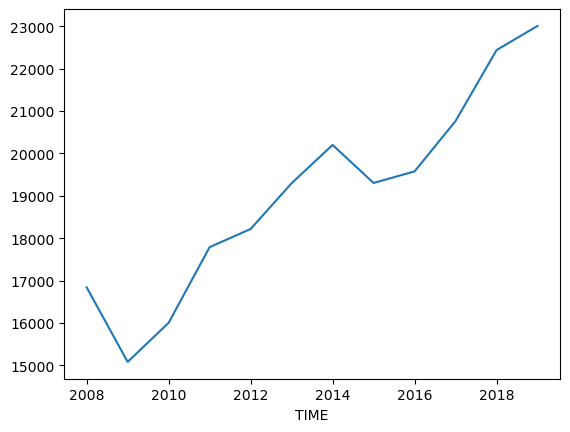

In [69]:
val_by_year.plot()

Reset the index on locations_df such that it has a (default) numeric index and
two columns (LOCATION and NAME). Now run join on locations_df, specifying
that you want to use the LOCATION column on the caller rather than its index. (The
data frame passed as an argument to join will always be joined on its index.)

In [70]:
locations_df = locations_df.reset_index()

In [72]:
locations_df.head(2)

,LOCATION,NAME
0,AUS,Australia
1,AUT,Austria
